<a href="https://colab.research.google.com/github/LeeGyeongyong/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_7%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오픈소스 기반 데이터 분석 7강 - 데이터 전처리 2

### 7-1 데이터 결측치 찾기

In [ ]:
import pandas as pd
import numpy as np

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}

df = pd.DataFrame(data)

## 결측치 여부 확인
df.isnull()
df.isna()

## 열별, 행별 결측치 개수 확인
print(df)
df.isnull().sum()
df.isnull().sum(axis = 1)

## 특정 열, 행 결측치 확인
df[df.isnull().any(axis = 1)]
df[df['나이'].isnull()]

## 결측치가 아닌 항목 확인
df.notnull()

## 결측치 비율
df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100


    이름    나이    도시    점수
0  김철수  25.0    서울  90.0
1  이영희  30.0  None  85.0
2  박민수   NaN    인천   NaN
3  최지훈  22.0    서울  80.0
4  정소희  35.0    대전  92.0


np.float64(15.0)

### 7-2 데이터 시각화를 이용한 결측치 찾기

In [29]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

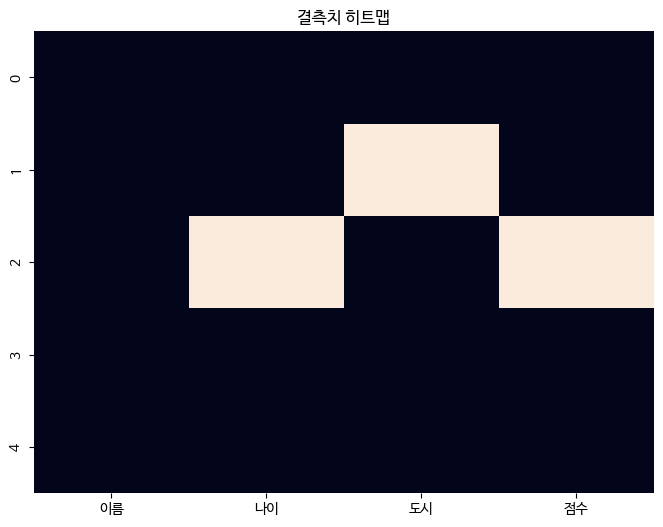

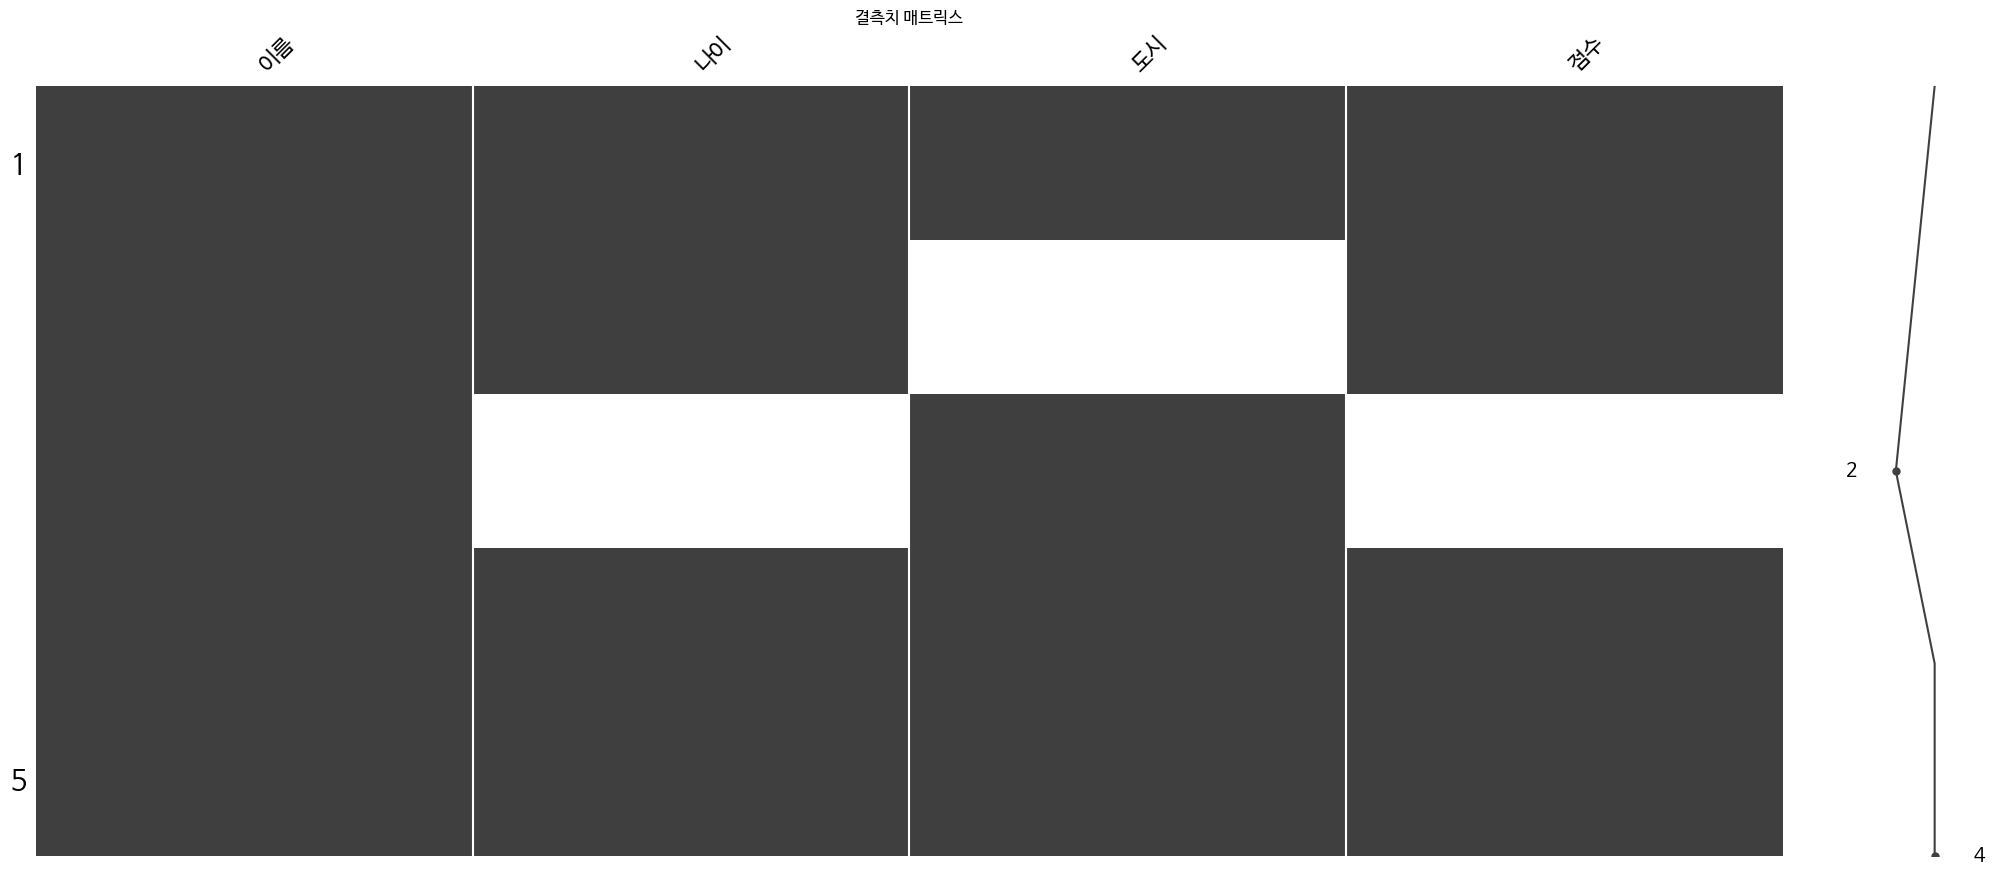

In [2]:
import numpy as np
import pandas as pd

### 시각화 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}
df = pd.DataFrame(data)

### 결측치 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("결측치 히트맵")
plt.show()

### 결측치 매트릭스
msno.matrix(df)
plt.title("결측치 매트릭스")
plt.show()

### 7-3 사분위 범위를 통한 이상치 찾기

In [ ]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

### 사분위 범위 경계값 계산
q1 = df['점수'].quantile(0.25)
q3 = df['점수'].quantile(0.75)
iqr = q3 - q1
하한값 = q1 - 1.5 * iqr
상한값 = q3 - 1.5 * iqr

### IQR 통계량 출력
print( q1 )
print( q3 )
print( iqr )
print( 하한값 )
print( 상한값 )


63.25
85.0
21.75
30.625
52.375


### 7-4 Z-점수를 통한 이상치 찾기

In [ ]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

### Z-점수 계산
점수_평균 = df['점수'].mean()
점수_표준편차 = df['점수'].std()
df['점수_Z'] = (df['점수'] - 점수_평균) / 점수_표준편차
df


### 임계값 설정 및 이상치 여부 판단
임계값 = 2
df['이상치여부'] = df['점수_Z'].abs() > 임계값
df

### 이상치 데이터 출력
df[df['이상치여부']]

### 이상치 비율 출력
df['이상치여부'].mean() * 100

np.float64(12.5)

### 7-5 평균값 및 선형보간법을 통한 결측치 처리

In [ ]:
import pandas as pd
import numpy as np

file_path = "raw_large_shopping_customer.csv"
df = pd.read_csv(file_path)
print(df.isnull().sum())

df_cleaned = df.dropna(thresh=df.shape[1] - 1)

### 나이, 소득 평균값 대치 및 결과 출력
df_cleaned.loc[:, ['나이', '소득']] = df_cleaned[['나이', '소득']].fillna(df_cleaned[['나이', '소득']].mean())
df_cleaned

### 지출, 평균구매횟수 선형보간법 적용
df_cleaned.loc[:, ['지출', '평균구매횟수']] = df_cleaned[['지출', '평균구매횟수']].interpolate(method = 'linear')



df_cleaned.to_csv("cleaned_large_shopping_customer.csv", index=False, encoding="utf-8-sig")

ID         0
나이        50
소득        50
지출        50
평균구매횟수    50
dtype: int64


### 7-6 DataFrame 값 변경

In [ ]:
import pandas as pd

data = {'age': [25, 30, None, 22, 35],
        'city': ['Seoul', None, 'Incheon', 'Seoul', 'Daejeon'],
        'score': [90, 85, None, 80, 92]}
df = pd.DataFrame(data)

### replace를 이용한 Seoul -> 서울
df['city'] = df['city'].replace('Seoul', '서울')

### replace를 이용한 None -> 미정, Incheon -> 인천
df['city'] = df['city'].replace({None: '미정', 'Incheon' : '인천'})

### map을 이용한 값 변경
df = pd.DataFrame(data)
city_map = {'Seoul': '서울특별시', None: '미정', 'Incheon':'인천광역시', 'Daejeon':'대전광역시'}
df['city'] = df['city'].map(city_map)
df['age_str'] = df['age'].map(lambda x: f"{x} 살" if pd.notna(x) else "알수없음")

### apply 함수를 이용한 값 변경
df['age_apply'] = df['age'].apply(lambda x : x*2 if pd.notna(x) else None)
print ("\n apply 함수를 이용한 값변경 : \n", df['age_apply'])

### apply 함수를 이용한 행단위 값 변경
def age_plus_score(row):
    age = row['age'] if pd.notna(row['age']) else 0
    score = row['score'] if pd.notna(row['score']) else 0
    return age + score
df['age_plus_score'] = df.apply(age_plus_score, axis = 1)
print("\n apply함수를 이용한 행단위 값 변경 : \n", df['age_plus_score'])

### loc 인덱스를 이용한 값 변경
df.loc[df['score'] < 90, 'score' ] = 90
print("\n 점수가 90점 미만인 사람 90점으로 변경 : \n", df)

### where 함수를 이용한 값 변경
df['age_where'] = df['age'].where(df['age'] >= 30, other = 0)
print("\n age가 30이상인 값만 유지하고 나머지를 0으로 변경 \n", df['age_where'])
df




 apply 함수를 이용한 값변경 : 
 0    50.0
1    60.0
2     NaN
3    44.0
4    70.0
Name: age_apply, dtype: float64

 apply함수를 이용한 행단위 값 변경 : 
 0    115.0
1    115.0
2      0.0
3    102.0
4    127.0
Name: age_plus_score, dtype: float64

 점수가 90점 미만인 사람 90점으로 변경 : 
     age   city  score age_str  age_apply  age_plus_score
0  25.0  서울특별시   90.0  25.0 살       50.0           115.0
1  30.0     미정   90.0  30.0 살       60.0           115.0
2   NaN  인천광역시    NaN    알수없음        NaN             0.0
3  22.0  서울특별시   90.0  22.0 살       44.0           102.0
4  35.0  대전광역시   92.0  35.0 살       70.0           127.0

 age가 30이상인 값만 유지하고 나머지를 0으로 변경 
 0     0.0
1    30.0
2     0.0
3     0.0
4    35.0
Name: age_where, dtype: float64


,age,city,score,age_str,age_apply,age_plus_score,age_where
0,25.0,서울특별시,90.0,25.0 살,50.0,115.0,0.0
1,30.0,미정,90.0,30.0 살,60.0,115.0,30.0
2,NaN,인천광역시,NaN,알수없음,NaN,0.0,0.0
3,22.0,서울특별시,90.0,22.0 살,44.0,102.0,0.0
4,35.0,대전광역시,92.0,35.0 살,70.0,127.0,35.0


### 7-7 날짜 데이터 타입 다루기


In [ ]:
date_str = ['2025-07-01', '2025-08-01', '2025-09-01']
df_date = pd.DataFrame({'date_str':date_str})

### datetime 타입 변환
df_date['date'] = pd.to_datetime(df_date['date_str'])
#df_date
#df_date.info()

### 날짜 데이터 분리
print(df_date['date'].dt.year)
print(df_date['date'].dt.month)
print(df_date['date'].dt.day)
print(df_date['date'].dt.day_name())

### 날짜 데이터 포멧 변경
df_date['date_formatted'] = df_date['date'].dt.strftime('%y/ %m/ %d')
df_date

0    2025
1    2025
2    2025
Name: date, dtype: int32
0    7
1    8
2    9
Name: date, dtype: int32
0    1
1    1
2    1
Name: date, dtype: int32
0    Tuesday
1     Friday
2     Monday
Name: date, dtype: object


,date_str,date,date_formatted
0,2025-07-01,2025-07-01,25/ 07/ 01
1,2025-08-01,2025-08-01,25/ 08/ 01
2,2025-09-01,2025-09-01,25/ 09/ 01


In [6]:
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c store-sales-time-series-forecasting

!unzip store-sales-time-series-forecasting.zip

  0% 0.00/21.4M [00:00<?, ?B/s]
100% 21.4M/21.4M [00:00<00:00, 959MB/s]
Archive:  store-sales-time-series-forecasting.zip
  inflating: holidays_events.csv     
  inflating: oil.csv                 
  inflating: sample_submission.csv   
  inflating: stores.csv              
  inflating: test.csv                
  inflating: train.csv               
  inflating: transactions.csv        


## 7-8 실습 시나리오 - 데이터 정제

In [7]:
import pandas as pd

# Grocery Sales 데이터 DataFrame 로드
train = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
transactions = pd.read_csv('transactions.csv')
oil = pd.read_csv('oil.csv')
holidays_events = pd.read_csv('holidays_events.csv')

# 판매 데이터 살펴보기
#train.info()
print("학습데이터 기본정보:")
print(train.info())

학습데이터 기본정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None


In [8]:
print("판매 데이터 기본 통계량:")
print(train.describe())

print("\n 매장 데이터 기본정보:")
print(stores.head())

print("\n 원유 가격 데이터 기본정보:")
print(oil.head())

판매 데이터 기본 통계량:
                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02

 매장 데이터 기본정보:
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo

### [재수행] 6-5 실습 시나리오 - Kaggle을 활용한 데이터 수집 및 측정

### 데이터 분포 시각화

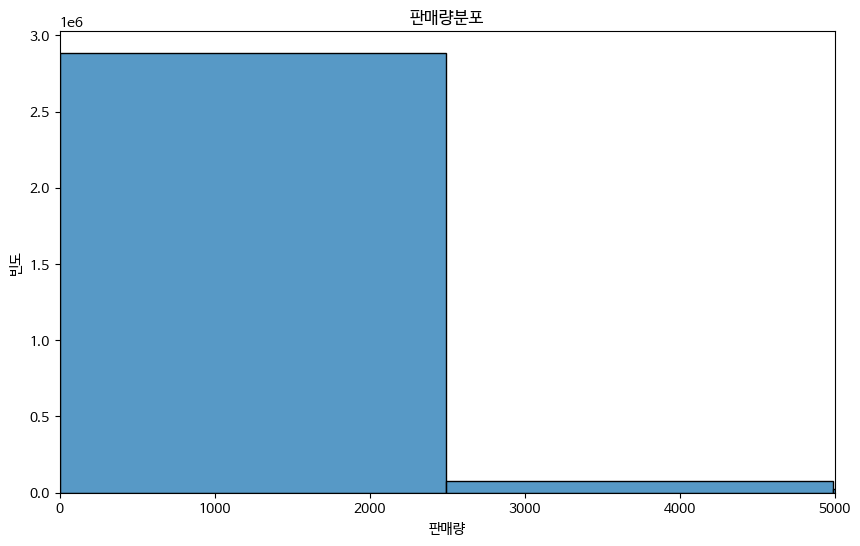

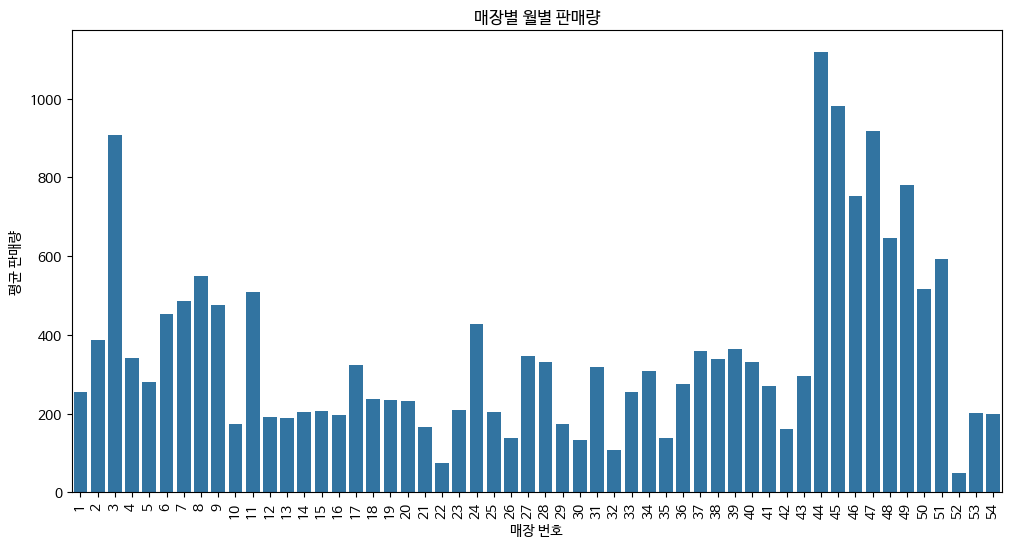

In [10]:
#import matplot.pylot as plt

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train['sales'], bins=50)
plt.title("판매량분포")
plt.xlabel("판매량")
plt.ylabel("빈도")
plt.xlim(0, 5000)
plt.show()

store_sales = train.groupby('store_nbr')['sales'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='store_nbr', y='sales', data=store_sales)
plt.title("매장별 월별 판매량")
plt.xlabel("매장 번호")
plt.ylabel("평균 판매량")
plt.xticks(rotation=90)
plt.show()

### 결측치 처리

In [10]:
## 판매, 매장, 거래, 원유, 휴일이벤트 데이터 결측치
print("훈련데이터 결측치")
print(train.isnull().sum())

print("\n 매장 데이터 결측치")
print(stores.isnull().sum())

print("\n 거래 데이터 결측치")
print(transactions.isnull().sum())

print("\n 원유 가격 데이터 결측치")
print(oil.isnull().sum())

print("\n 휴일 데이터 결측치")
print(holidays_events.isnull().sum())

훈련데이터 결측치
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

 매장 데이터 결측치
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

 거래 데이터 결측치
date            0
store_nbr       0
transactions    0
dtype: int64

 원유 가격 데이터 결측치
date           0
dcoilwtico    43
dtype: int64

 휴일 데이터 결측치
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


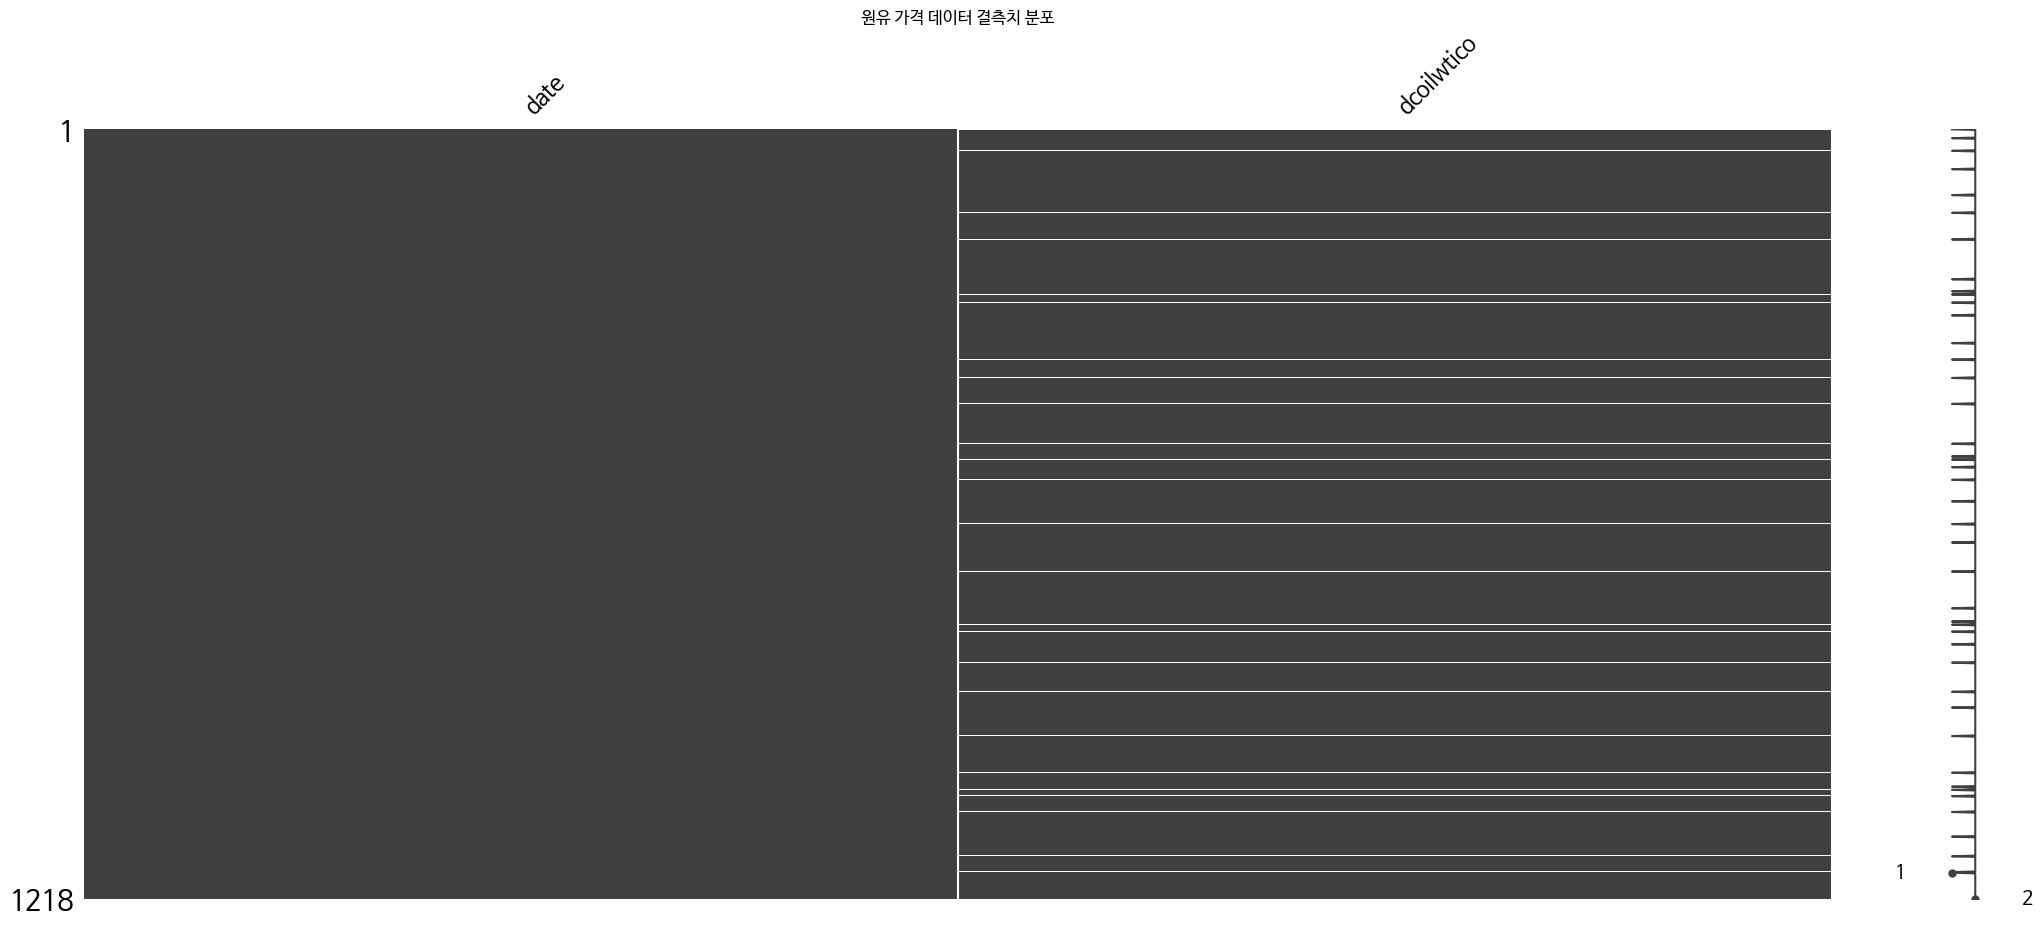

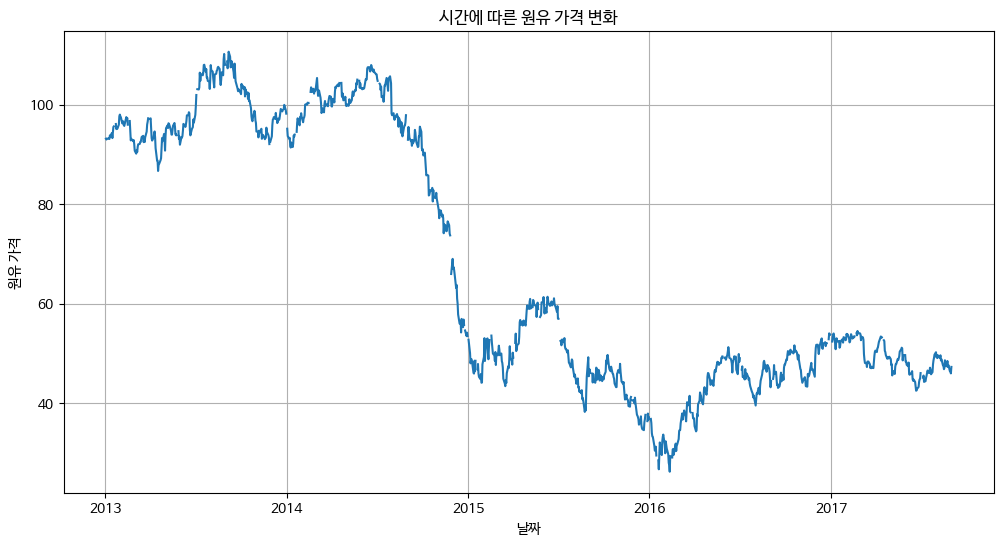

In [11]:
import missingno as msno

msno.matrix(oil)
plt.title("원유 가격 데이터 결측치 분포")
plt.show()

oil['date'] = pd.to_datetime(oil['date'])
plt.figure(figsize=(12, 6))
plt.plot(oil['date'], oil['dcoilwtico'])
plt.title("시간에 따른 원유 가격 변화")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

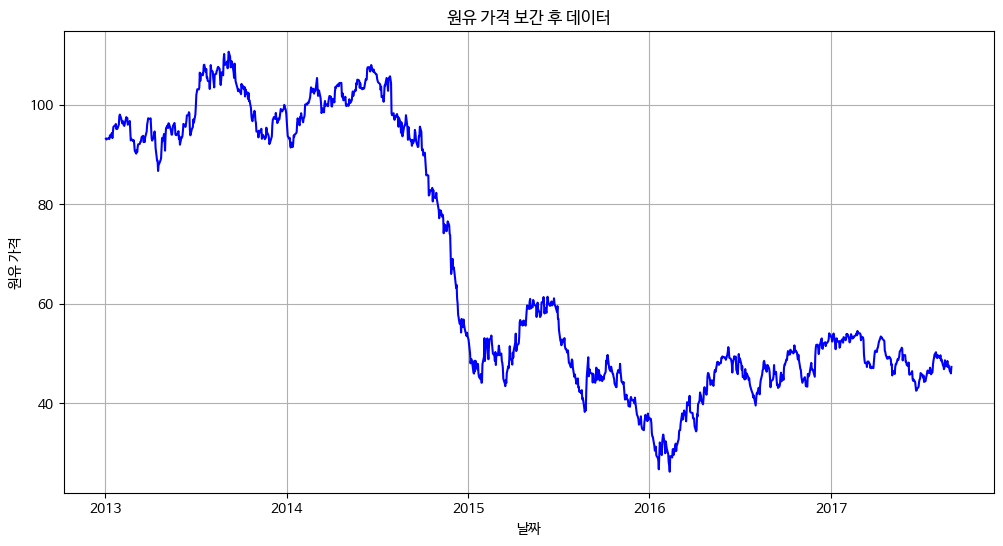

In [12]:
oil_cleaned = oil.copy()

### 선형 보간법 적용한 원유 가격 데이터
oil_cleaned['dcoilwtico'] = oil_cleaned['dcoilwtico'].interpolate(method = 'linear')

plt.figure(figsize=(12, 6))
plt.plot(oil_cleaned['date'], oil_cleaned['dcoilwtico'], 'b-')
plt.title("원유 가격 보간 후 데이터")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

### 이상치 처리

이상치 개수: 200,274건
전체 대비 비율: 20027400.00%


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


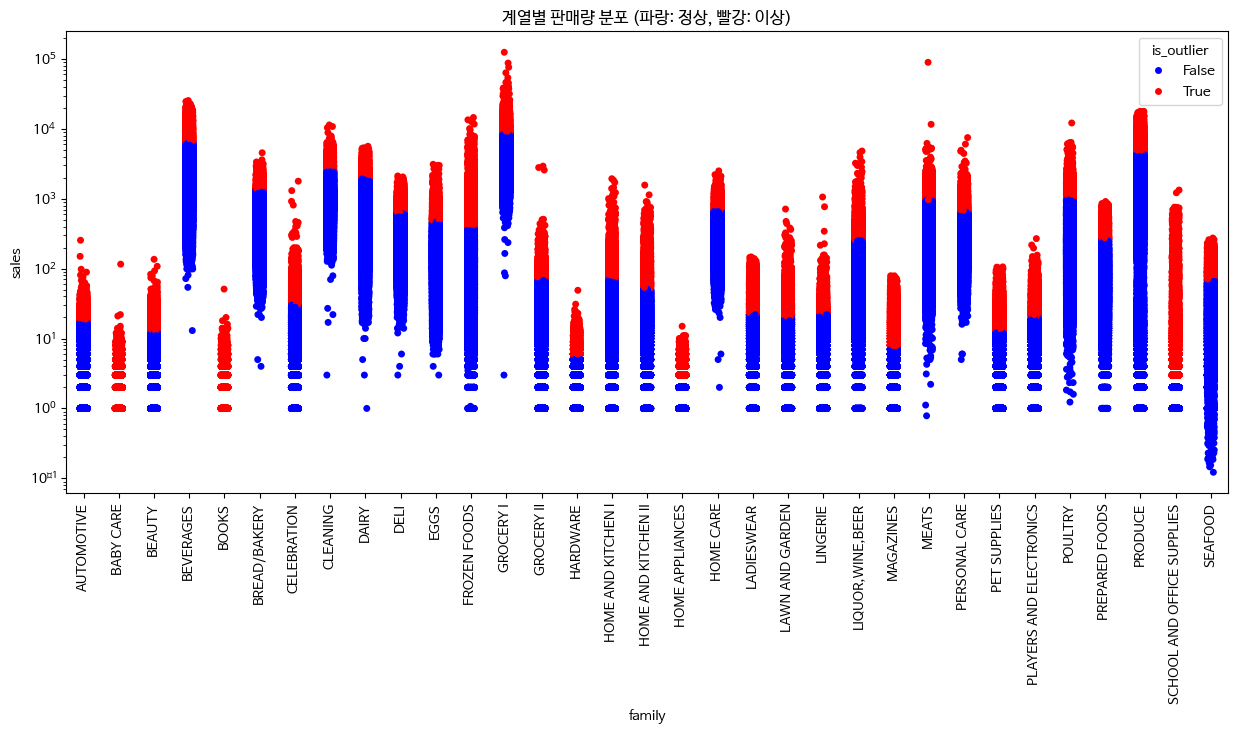

In [13]:
### 제품 계열별 판매 데이터 IQR 계산
family_bounds = train.groupby('family')['sales'].apply(lambda x: x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))

### 상한값 초과 판매량 이상치 분류
train_enhanced = train.copy()
train_enhanced['upper_bound'] = train_enhanced['family'].map(family_bounds)
train_enhanced['is_outlier'] = train_enhanced['sales'] > train_enhanced['upper_bound']

total_outliers = train_enhanced['is_outlier'].sum()
total_ratio = train_enhanced['is_outlier'].sum()


print(f"이상치 개수: {total_outliers:,}건")
print(f"전체 대비 비율: {total_ratio:.2%}")

plt.figure(figsize=(15,6))
sns.stripplot(x='family', y='sales', hue=train_enhanced['is_outlier'],
              data=train_enhanced, palette={False:'blue', True:'red'})
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('계열별 판매량 분포 (파랑: 정상, 빨강: 이상)')
plt.show()

In [14]:
# upper_bounds = family_bounds['upper_bound']

### 판매량이 상한값 초과 시, 판매량으로 상한값으로 대체
train_cleaned  = train.copy()
train_cleaned.loc[train_enhanced['is_outlier'], 'sales'] = train_enhanced.loc[train_enhanced['is_outlier'], 'upper_bound']

changed_count = (train['sales'] != train_cleaned ['sales']).sum()
print(f"대체된 데이터 수: {changed_count}건")

대체된 데이터 수: 200274건


### 날짜 데이터 처리

In [17]:
### 판매, 거래, 휴일 이벤트, 원율 데이터 내 date 컬럼 데이터 datetime 데이터 타입으로 변경
train_cleaned['date'] = pd.to_datetime(train_cleaned['date'])
transactions['date'] = pd.to_datetime(transactions['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])
oil_cleaned['date'] = pd.to_datetime(oil_cleaned['date'])

train_cleaned['year'] = train_cleaned['date'].dt.year
train_cleaned['month'] = train_cleaned['date'].dt.month
train_cleaned['day'] = train_cleaned['date'].dt.day
train_cleaned['dayofweek'] = train_cleaned['date'].dt.dayofweek
### 주말, 월초, 월말 여부 추철
train_cleaned['weekend'] = train_cleaned['dayofweek'].apply(lambda x:1 if x >= 5 else 0 )
train_cleaned['is_month_start'] = train_cleaned['date'].dt.is_month_start
train_cleaned['is_month_end'] = train_cleaned['date'].dt.is_month_end

print("날짜 특성 추출 결과:")
print(train_cleaned[['date', 'year', 'month', 'day', 'dayofweek', 'weekend', 'is_month_start', 'is_month_end']].head())

날짜 특성 추출 결과:
        date  year  month  day  dayofweek  weekend  is_month_start  \
0 2013-01-01  2013      1    1          1        0            True   
1 2013-01-01  2013      1    1          1        0            True   
2 2013-01-01  2013      1    1          1        0            True   
3 2013-01-01  2013      1    1          1        0            True   
4 2013-01-01  2013      1    1          1        0            True   

   is_month_end  
0         False  
1         False  
2         False  
3         False  
4         False  


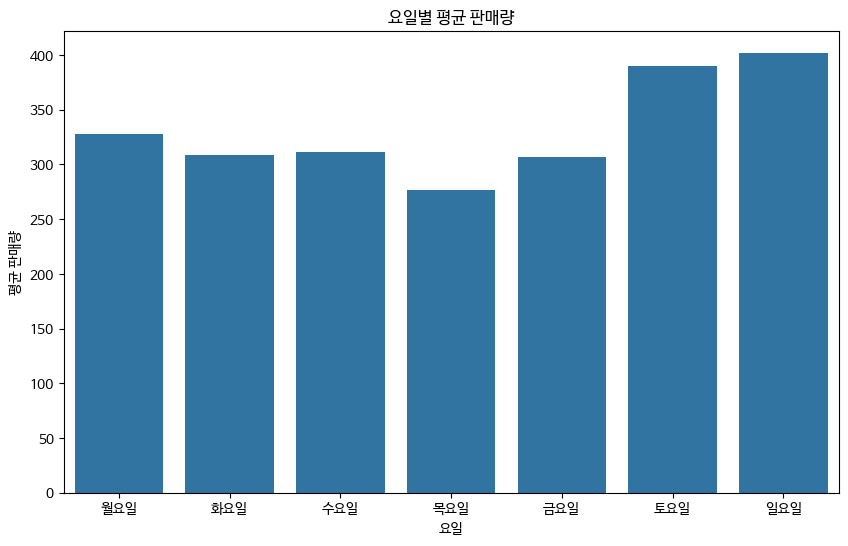

In [18]:
## 요일별 평균 판매량을 계산
day_sales = train_cleaned.groupby('dayofweek')['sales'].mean().reset_index()

## 요일 출력값 변경
day_sales['day_name'] = day_sales['dayofweek'].map({0:'월요일', 1:'화요일', 2:'수요일',
                                                    3:'목요일', 4:'금요일', 5:'토요일',
                                                    6:'일요일',})

plt.figure(figsize=(10, 6))
sns.barplot(x='day_name', y='sales', data=day_sales)
plt.title("요일별 평균 판매량")
plt.xlabel("요일")
plt.ylabel("평균 판매량")
plt.show()

### 데이터 통합

In [19]:
## 판매, 거래 데이터 통합
train_with_trans = pd.merge(train_cleaned, transactions, on = ['date', 'store_nbr'], how = 'left')

## 매장 데이터 통합
train_with_store = pd.merge(train_with_trans, stores, on = ['store_nbr'], how = 'left')

## 원유 데이터 통합
train_final = pd.merge(train_with_store, oil_cleaned, on = ['date'], how = 'left')

print("최종 데이터셋 정보:")
print(f"행 개수: {train_final.shape[0]}, 열 개수: {train_final.shape[1]}")
print(train_final.columns.tolist())
print(train_final.head())

최종 데이터셋 정보:
행 개수: 3000888, 열 개수: 19
['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month', 'day', 'dayofweek', 'weekend', 'is_month_start', 'is_month_end', 'transactions', 'city', 'state', 'type', 'cluster', 'dcoilwtico']
   id       date  store_nbr      family  sales  onpromotion  year  month  day  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  2013      1    1   
1   1 2013-01-01          1   BABY CARE    0.0            0  2013      1    1   
2   2 2013-01-01          1      BEAUTY    0.0            0  2013      1    1   
3   3 2013-01-01          1   BEVERAGES    0.0            0  2013      1    1   
4   4 2013-01-01          1       BOOKS    0.0            0  2013      1    1   

   dayofweek  weekend  is_month_start  is_month_end  transactions   city  \
0          1        0            True         False           NaN  Quito   
1          1        0            True         False           NaN  Quito   
2          1        0            True  